<h1 style="background-image: linear-gradient( 135deg, #ABDCFF 10%, #0396FF 100%);">data and reshape

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
x_values = np.linspace(-1, 1, 100) #等差數列 
x_train = np.array(x_values, dtype=np.float32) # to np.float32
x_train = x_train.reshape(-1, 1) #reshape it as specific shape, especially 1-vector data (100,) -> (100, 1)
y_train = x_train**2 + random.uniform(-20, 20)

In [3]:
y_train.shape

(100, 1)

In [4]:
x_train.shape

(100, 1)

<h1 style="background-image: linear-gradient( 135deg, #ABDCFF 10%, #0396FF 100%);"> pytorch start

### 1.建立模型

In [5]:
class LR(nn.Module): # 繼承torch.nn.module特性
    
    # 架構
    def __init__(self):
        super(LR, self).__init__() # super(LR, self) 繼承自己的__init__()
        self.hidden1 = nn.Linear(1, 10) # input 1, hidden 10  Linear全連接
        self.hidden2 = nn.Linear(10, 1) # hidden 10, output 1

    # 運作流程（資料流）
    def forward(self, x):  
        x = F.relu(self.hidden1(x)) # 讓x由hidden1後，進入activation function
        out = self.hidden2(x)
        return out

In [6]:
model = LR()
loss_func = nn.MSELoss()
learning_rate = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #model.parameters() 所有訓練的參數都在這

In [7]:
# for plot
plt.ion()

### 2.進行訓練

In [10]:
epochs = 1000

epoch 5, loss 3.28017235
epoch 10, loss 0.19490536
epoch 15, loss 0.15846126
epoch 20, loss 0.14668554
epoch 25, loss 0.14149868
epoch 30, loss 0.13817044
epoch 35, loss 0.13542014
epoch 40, loss 0.13290942
epoch 45, loss 0.13054380
epoch 50, loss 0.12827888
epoch 55, loss 0.12610698
epoch 60, loss 0.12401440
epoch 65, loss 0.12199774
epoch 70, loss 0.12005535
epoch 75, loss 0.11818568
epoch 80, loss 0.11637803
epoch 85, loss 0.11462747
epoch 90, loss 0.11293361
epoch 95, loss 0.11128794
epoch 100, loss 0.10968690
epoch 105, loss 0.10813314
epoch 110, loss 0.10662256
epoch 115, loss 0.10514560
epoch 120, loss 0.10370475
epoch 125, loss 0.10229751
epoch 130, loss 0.10091910
epoch 135, loss 0.09956506
epoch 140, loss 0.09823676
epoch 145, loss 0.09693141
epoch 150, loss 0.09564491
epoch 155, loss 0.09437516
epoch 160, loss 0.09312192
epoch 165, loss 0.09188332
epoch 170, loss 0.09065782
epoch 175, loss 0.08944137
epoch 180, loss 0.08823466
epoch 185, loss 0.08703607
epoch 190, loss 0.085

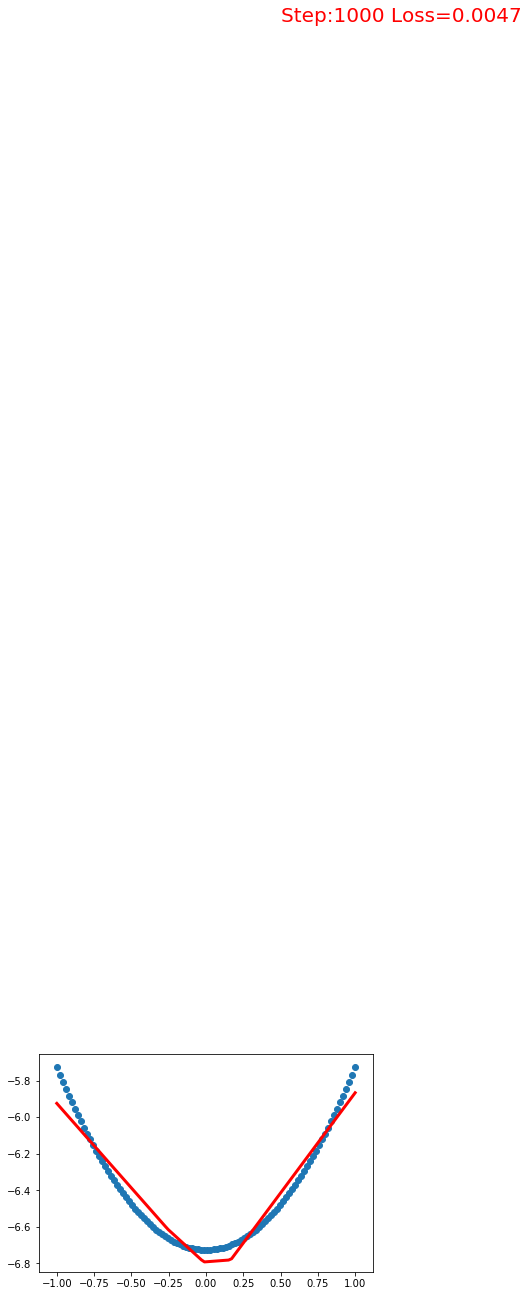

In [11]:
for epoch in range(epochs):
    epoch += 1

    # convert to variables
    x = Variable(torch.from_numpy(x_train))
    y = Variable(torch.from_numpy(y_train))

    # clear gradient w.r.t. parameters 
    optimizer.zero_grad()
    
    # forward to get output
    prediction = model(x)

    # calculate loss
    loss = loss_func(prediction, y)

    # backward to get gradient
    loss.backward()

    # update parameters
    optimizer.step() 

    if epoch % 5 == 0:
    # plot and show learning process
        print("epoch %d, loss %.8f" % (epoch, loss.data[0]))
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=3)
        plt.text(0.5, 0, 'Step:%d Loss=%.4f' % (epoch, loss.data[0]), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

<h1 style="background-image: linear-gradient( 135deg, #ABDCFF 10%, #0396FF 100%);">Model Export

### save the model

In [12]:
# save_model = False
# if save_model == True:
#     torch.save(model.state_dict(), "nonlinear_model.pkl")

### load model

In [13]:
# load_model = False
# if load_model is True:
#     model.load_state_dict(torch.load("nonlinear_model.pkl"))